## Falta:
- Papeis que mais saíram da dti (faz sentido ver se estamos perdendo um papel específico); ponderar por representatividade na empresa
- Situação dos feedbacks estruturados (ação de RH)
- Gráfico de forecast por mês (acerto vs erro, mostrando forecast dos últimos três meses) 
- % de horas faturadas versus inverso do custo médio da hora (custo total faturado)
- % da margem sendo consumida por recursos centralizados (histórico)

In [1]:
# bibliotecas

import pandas as pd # para os dataframes
import numpy as np # para alguns cálculos realizados
import matplotlib.pyplot as plt # para plotar
import seaborn as sns # para plotar mais fácil

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# paletas de cores
corDegrade = ['#DB6B2E','#E28958','#E9A682','#F1C4AB','#F8E1D5']
corContraste = ['#CF3779','#ADC242','#432466','#55A8B5']
corContraste50 = ['#E79BBC','#D6E0A0','#A191B3','#AAD3DA']

In [3]:
# leitura de arquivos
nomeArquivo = 'formato rdn.xlsx'
demissional = pd.read_excel(nomeArquivo,sheet_name='demissionais')
netsuite = pd.read_excel(nomeArquivo,sheet_name='netsuite')
financeiro = pd.read_excel(nomeArquivo,sheet_name='financeiro')
oneOnOne = pd.read_excel(nomeArquivo,sheet_name='oneOnOne')
onboarding = pd.read_excel(nomeArquivo,sheet_name='onboarding')
alavancagem = pd.read_excel(nomeArquivo,sheet_name='alavancagem')
# pessoasCrossHive = pd.read_excel(nomeArquivo,sheet_name='pessoasCrossHive')

In [4]:
# funções

def lidaIndices(df,colPlot,tipoGrupo, grupo):
    # lida com o problema de indices faltando
    idxDiferencas = df.loc[df[tipoGrupo]==grupo][colPlot].value_counts().index
    idxGeral = df[colPlot].value_counts().index
    mascara = idxGeral.isin(idxDiferencas)
    idxFaltando = list(df[colPlot].value_counts()[~mascara].index)
    diferencasGrupo = df.loc[df[tipoGrupo]==grupo][colPlot].value_counts()
    diferencasGeral = df[colPlot].value_counts()
    for idx in idxFaltando:
        diferencasGrupo[idx]=0   
    # ordenar os índices igual ao geral
    diferencasGrupo = diferencasGrupo.reindex(idxGeral)
    return [idxGeral, diferencasGrupo, diferencasGeral]

def plotaPilha(df,colPlot,tipoGrupo,grupo,titulo,legenda):
    indices = lidaIndices(df,colPlot, tipoGrupo,grupo)
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    ordenacao = df[colPlot].value_counts().index

    ax.barh(indices[0],indices[2],color=corDegrade[1])
    ax.barh(indices[0],indices[1],color=corDegrade[0])
    ax.invert_yaxis()

    # adicionar labels com as contagens
    for i, v in enumerate(df[colPlot].value_counts()):
        ax.annotate(v,xy=(v-0.5,i),va='center',fontsize=12,color='white')

    for i, v in enumerate(indices[1]):
        ax.annotate(v,xy=(v-0.3,i),va='center',fontsize=12,color='white')

    #remover eixos
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,
        labelbottom=False) # labels along the bottom edge are off
    ax.set_title(titulo,fontsize=16);
    plt.rc('ytick', labelsize=12)
    plt.rc('legend', fontsize=12)
    plt.legend(legenda,loc='right');
    
def plotaBarraH(dadosColuna,titulo):
    mascara = dadosColuna.value_counts()>1
    maiores = dadosColuna.value_counts().loc[mascara]
    outros = dadosColuna.value_counts().loc[~mascara].sum()
    maiores['outros'] = outros
    
    fig,ax = plt.subplots(1,1,figsize=(8,8))

    ax.barh(maiores.index.str.title(),maiores,color=corDegrade[0])
    ax.invert_yaxis()

    # adicionar labels com as contagens
    for i, v in enumerate(maiores):
        ax.annotate(v,xy=(v+0.5,i),va='center',fontsize=12)

    # remover eixos
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel('')
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,
        labelbottom=False) # labels along the bottom edge are off
    plt.rc('ytick', labelsize=12)
    ax.set_title(titulo,fontsize=16);
    ax.get_children()[len(maiores.index)-1].set_alpha(0.2)
    
# mostrar labels no gráfico de pizza
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Demissional

In [5]:
demissional.loc[demissional['tipoDesligamento']=='Involuntário']['tribo'].value_counts()

Hive        2
Raptors     1
Cangurus    1
Name: tribo, dtype: int64

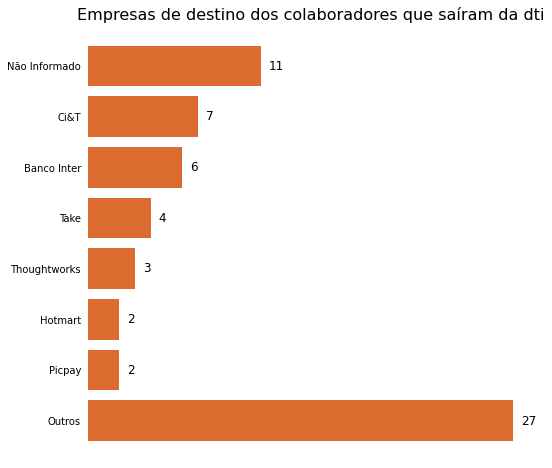

In [6]:
mascara = demissional['empresaDestino'].value_counts()>1
maiores = demissional['empresaDestino'].value_counts().loc[mascara]
outros = demissional['empresaDestino'].value_counts().loc[~mascara].sum()
maiores['outros'] = outros

# empresas destino
fig,ax = plt.subplots(1,1,figsize=(8,8))

ax.barh(maiores.index.str.title(),maiores,color=corDegrade[0])
ax.invert_yaxis()

# adicionar labels com as contagens
for i, v in enumerate(maiores):
    ax.annotate(v,xy=(v+0.5,i),va='center',fontsize=12)
    
# remover eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelbottom=False) # labels along the bottom edge are off
plt.rc('ytick', labelsize=12)
ax.set_title('Empresas de destino dos colaboradores que saíram da dti',fontsize=16);

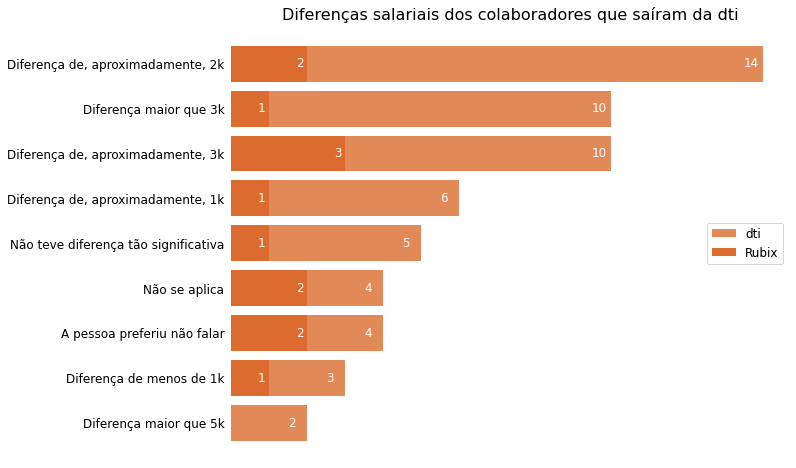

In [7]:
plotaPilha(demissional,'diferencaProposta','alianca','Rubix','Diferenças salariais dos colaboradores que saíram da dti',['dti','Rubix'])
# salvar figura
plt.savefig('diferencaSalarial.png')

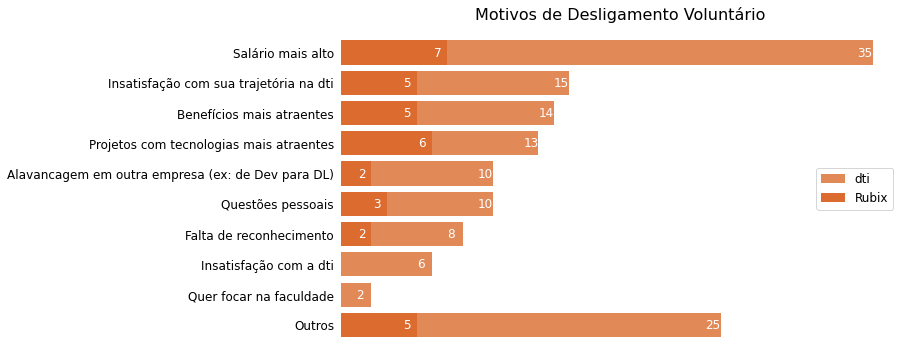

In [33]:
#calcula para rubix
motivoDesligamentoRubix = demissional['motivoDesligamento'].loc[(demissional['alianca']=='Rubix') & (demissional['tipoDesligamento']=='Voluntário')].str.get_dummies(';')
somaMotivoDesligamentoRubix = motivoDesligamentoRubix.sum().sort_values(ascending=False)
mascara = somaMotivoDesligamentoRubix>1
maioresRubix = somaMotivoDesligamentoRubix[mascara]
outros = somaMotivoDesligamentoRubix[~mascara].sum()
maioresRubix['Outros'] = outros

# calcula para dti
motivoDesligamentoDti = demissional['motivoDesligamento'].loc[demissional['tipoDesligamento']=='Voluntário'].str.get_dummies(';')
somaMotivoDesligamentoDti = motivoDesligamentoDti.sum().sort_values(ascending=False)
mascara = somaMotivoDesligamentoDti>1
maioresDti = somaMotivoDesligamentoDti[mascara]
outros = somaMotivoDesligamentoDti[~mascara].sum()
maioresDti['Outros'] = outros

# trata os índices que faltam
idxFaltando = set(maioresDti.index)-set(maioresRubix.index)
for idx in idxFaltando:
    maioresRubix[idx]=0
    
# ordena indices
maioresRubix = maioresRubix.reindex(maioresDti.index)

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(maioresDti.index,maioresDti,color=corDegrade[1])
ax.barh(maioresDti.index,maioresRubix,color=corDegrade[0])
ax.invert_yaxis()

# adicionar labels com as contagens
for i, v in enumerate(maioresDti):
    ax.annotate(v,xy=(v-1,i),va='center',fontsize=12,color='white')

for i, v in enumerate(maioresRubix):
    ax.annotate(v,xy=(v-0.9,i),va='center',fontsize=12,color='white')

#remover eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelbottom=False) # labels along the bottom edge are off
ax.set_title('Motivos de Desligamento Voluntário',fontsize=16);
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.legend(['dti','Rubix'],loc='right');
# salvar figura
plt.savefig('motivosVoluntário.png')

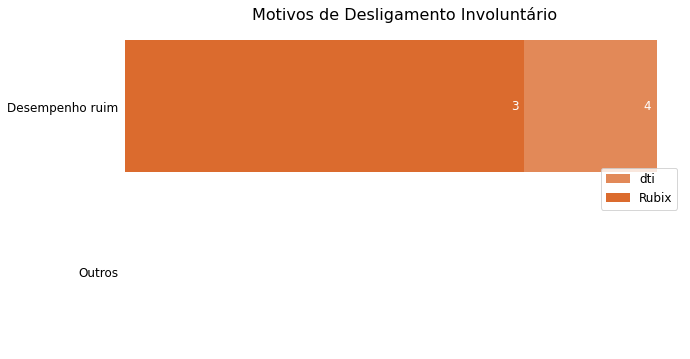

In [9]:
#calcula para rubix
motivoDesligamentoRubix = demissional['motivoDesligamento'].loc[(demissional['alianca']=='Rubix') & (demissional['tipoDesligamento']=='Involuntário')].str.get_dummies(';')
somaMotivoDesligamentoRubix = motivoDesligamentoRubix.sum().sort_values(ascending=False)
mascara = somaMotivoDesligamentoRubix>1
maioresRubix = somaMotivoDesligamentoRubix[mascara]
outros = somaMotivoDesligamentoRubix[~mascara].sum()
maioresRubix['Outros'] = outros

# calcula para dti
motivoDesligamentoDti = demissional['motivoDesligamento'].loc[demissional['tipoDesligamento']=='Involuntário'].str.get_dummies(';')
somaMotivoDesligamentoDti = motivoDesligamentoDti.sum().sort_values(ascending=False)
mascara = somaMotivoDesligamentoDti>1
maioresDti = somaMotivoDesligamentoDti[mascara]
outros = somaMotivoDesligamentoDti[~mascara].sum()
maioresDti['Outros'] = outros

# trata os índices que faltam
idxFaltando = set(maioresDti.index)-set(maioresRubix.index)
for idx in idxFaltando:
    maioresRubix[idx]=0
    
# ordena indices
maioresRubix = maioresRubix.reindex(maioresDti.index)

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(maioresDti.index,maioresDti,color=corDegrade[1])
ax.barh(maioresDti.index,maioresRubix,color=corDegrade[0])
ax.invert_yaxis()

# adicionar labels com as contagens
for i, v in enumerate(maioresDti):
    ax.annotate(v,xy=(v-0.1,i),va='center',fontsize=12,color='white')

for i, v in enumerate(maioresRubix):
    ax.annotate(v,xy=(v-0.1,i),va='center',fontsize=12,color='white')

#remover eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelbottom=False) # labels along the bottom edge are off
ax.set_title('Motivos de Desligamento Involuntário',fontsize=16);
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.legend(['dti','Rubix'],loc='right');
# salvar figura
plt.savefig('motivosDemissao.png')

### organizar
- Pegar dados por papel na empresa
- ponderar por papel

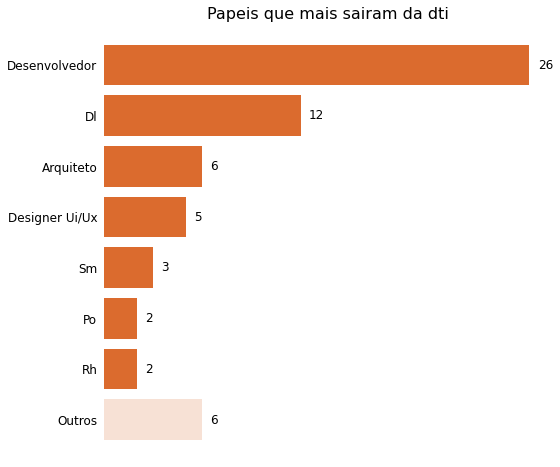

In [10]:
plotaBarraH(demissional['ultimoPapel'],'Papeis que mais sairam da dti')
# salvar figura
plt.savefig('papeisDemissao.png')

## Netsuite

In [11]:
# garantir o datetime para operações
netsuite['dataNasc'] = pd.to_datetime(netsuite['dataNasc'])
netsuite['dataFim'] = pd.to_datetime(netsuite['dataFim'])
netsuite.sample()

,nome,email,dataInicio,dataFim,tempoDti,vigente,dataNasc,genero,alianca,tribo,tipo,pcd
615,Gabriel Henrique Souza Haddad Campos,gabriel.haddad@dtidigital.com.br,2018-01-16,2020-01-19,2.01,Não,2021-03-23,Masculino,Camaleão,Calumma,Estágio,Não


In [12]:
# montar datasets com e sem duplicados (efetivações, saidas e retornos, etc)
dadosHive = netsuite[netsuite.tribo==' Hive']
dadosAlianca = netsuite[(netsuite.alianca=='Rubix1 ') | (netsuite.alianca=='Rubix2 ')]
dadosHiveSemDuplicados = dadosHive.sort_values('dataFim',ascending=True,na_position='first').drop_duplicates(subset=['email'])
dadosDTISemDuplicados = netsuite.sort_values('dataFim',ascending=True,na_position='first').drop_duplicates(subset=['email'])
dadosAliancaSemDuplicados = dadosAlianca.sort_values('dataFim',ascending=True,na_position='first').drop_duplicates(subset=['email'])

In [13]:
# # filtrar os cross da tribo
# naoCross = pessoasCrossHive.loc[pessoasCrossHive['cross']=='Não']
# dadosHiveSemDuplicados = dadosHiveSemDuplicados.merge(naoCross,how='inner',on='nome')

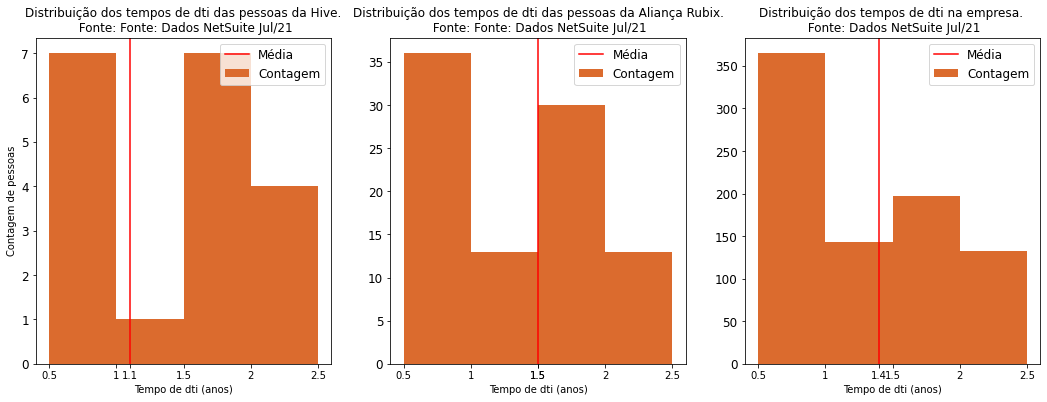

In [14]:
# organizar dados para plotar
mediaHive = round(dadosHiveSemDuplicados.tempoDti.mean(),1)
mediaAlianca = round(dadosAliancaSemDuplicados.tempoDti.mean(),1)
mediaDTI = round(dadosDTISemDuplicados.tempoDti.mean(),1)
binsHive = [0.5,1,1.5,2,2.5]
binsAlianca = [0.5,1,1.5,2,2.5]
binsDTI = [0.5,1,1.5,2,2.5]

#histograma da idade das pessoas a partir do censo e dos dados dti
fig, ax = plt.subplots(1,3,figsize=(18,6))

# Hive
ax[0].hist(dadosHiveSemDuplicados.loc[dadosHiveSemDuplicados.vigente=='Sim'].tempoDti,bins=binsHive,color=corDegrade[0])
ax[0].set_xlabel('Tempo de dti (anos)')
ax[0].set_ylabel('Contagem de pessoas')
binsHive.append(mediaHive)
ax[0].set_xticks(binsHive)
ax[0].set_xticklabels(binsHive)
ax[0].axvline(mediaHive,color='red')
ax[0].legend(['Média','Contagem'])
ax[0].set_title('Distribuição dos tempos de dti das pessoas da Hive.\n Fonte: Fonte: Dados NetSuite Jul/21');

# Alianca
ax[1].hist(dadosAliancaSemDuplicados.loc[dadosAliancaSemDuplicados.vigente=='Sim'].tempoDti,bins=binsAlianca,color=corDegrade[0])
ax[1].set_xlabel('Tempo de dti (anos)')
binsAlianca.append(mediaAlianca)
ax[1].set_xticks(binsAlianca)
ax[1].set_xticklabels(binsAlianca)
ax[1].axvline(mediaAlianca,color='red')
ax[1].legend(['Média','Contagem'])
ax[1].set_title('Distribuição dos tempos de dti das pessoas da Aliança Rubix.\n Fonte: Fonte: Dados NetSuite Jul/21');

# geral
ax[2].hist(dadosDTISemDuplicados.tempoDti,bins=binsDTI,color=corDegrade[0])
ax[2].set_xlabel('Tempo de dti (anos)')
binsDTI.append(mediaDTI)
ax[2].set_xticks(binsDTI)
ax[2].set_xticklabels(binsDTI)
ax[2].axvline(mediaDTI,color='red')
ax[2].legend(['Média','Contagem'])
ax[2].set_title('Distribuição dos tempos de dti na empresa. \n Fonte: Dados NetSuite Jul/21');
# salvar figura
plt.savefig('temposDtiHistograma.png')

# cruzar com aderência operacional

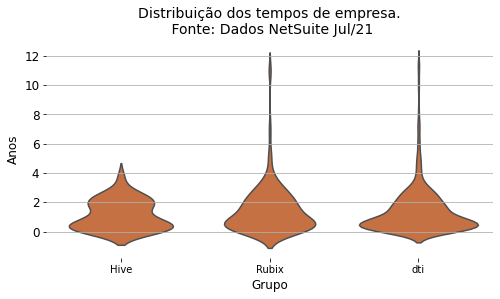

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
labels = ['Hive','Rubix','dti']
dadosY = [dadosHiveSemDuplicados.loc[dadosHiveSemDuplicados.vigente=='Sim'].tempoDti,
         dadosAliancaSemDuplicados.loc[dadosAliancaSemDuplicados.vigente=='Sim'].tempoDti,
         dadosDTISemDuplicados.tempoDti]
#remover eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

ax.grid(axis='y')
sns.violinplot(data=dadosY,color=corDegrade[0],inner=None)
ax.set_title('Distribuição dos tempos de empresa.\n Fonte: Dados NetSuite Jul/21',fontsize=14)
ax.set_ylabel('Anos',fontsize=12)
ax.set_xlabel('Grupo',fontsize=12)
ax.set_xticklabels(labels);
# salvar figura
plt.savefig('temposDtiViolino.png')

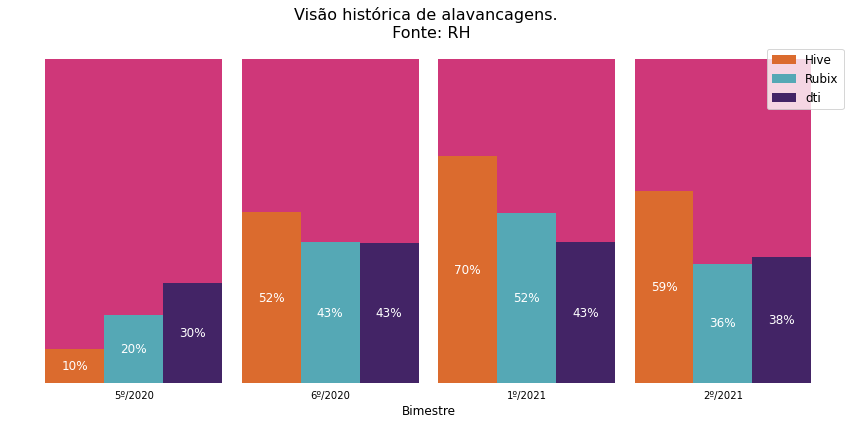

In [16]:
#labels
labelsGrupo = ['Hive','Rubix','dti']
labelsBimestre = alavancagem['bimestre'].astype(str)+'º/'+alavancagem['ano'].astype(str)

#parâmetros
largura = 0.3
x = np.arange(len(labelsBimestre))
pos1=x-largura
pos2=x
pos3=x+largura

hive100 = alavancagem['pessoasHiveAlavancadas']/alavancagem['pessoasHive']
rubix100 = alavancagem['pessoasRubixAlavancadas']/alavancagem['pessoasRubix']
dti100 = alavancagem['pessoasDtiAlavancadas']/alavancagem['pessoasDti']

color=[corDegrade[0],corContraste[3],corContraste[2]]

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(pos1,1,largura,color=corContraste[0])
ax.bar(pos1,hive100,largura,color=color[0],label='Hive')

ax.bar(pos2,1,largura,color=corContraste[0])
ax.bar(pos2,rubix100,largura,color=color[1],tick_label=list(labelsBimestre),label='Rubix')

ax.bar(pos3,1,largura,color=corContraste[0])
ax.bar(pos3,dti100,largura,color=color[2],label='dti')


# adicionar labels com as contagens
for idx, label in enumerate(range(len(hive100))):
    #hive
    ypos1 = hive100[idx]/2
    valor1 = hive100[idx]*100
    ax.text(pos1[idx],
            ypos1,
            str("%d" % valor1)+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    #rubix
    ypos2 = rubix100[idx]/2
    valor2 = rubix100[idx]*100
    ax.text(pos2[idx],
            ypos2,
            str("%d" % valor2)+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    #dti
    ypos3 = dti100[idx]/2
    valor3 = dti100[idx]*100
    ax.text(pos3[idx],
            ypos3,
            str("%d" % valor3)+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    
#remover eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#textos
ax.set_xlabel('Bimestre',fontsize=12)
ax.set_ylabel('',fontsize=12)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False) # labels along the bottom edge are off
ax.set_title('Visão histórica de alavancagens. \n Fonte: RH',fontsize=16);
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
ax.legend()

fig.tight_layout()

# salvar figura
plt.savefig('alavancagens.png')

<ipython-input-17-db7b0ab313bd>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labelsMedia,fontsize=12)


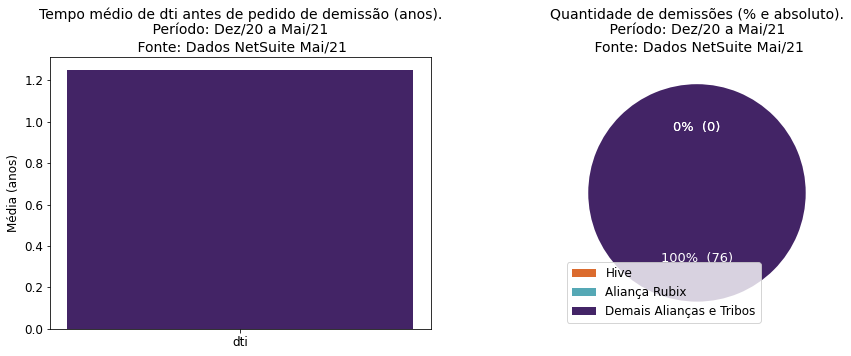

In [17]:
dataInicioSaida = pd.to_datetime('2020-12-01')
dataFimSaida = pd.to_datetime('2021-03-31')

# saídas hive
mascara = (dadosHiveSemDuplicados['dataFim'] > dataInicioSaida) & (dadosHiveSemDuplicados['dataFim'] <= dataFimSaida)
saidasHive = dadosHiveSemDuplicados.loc[mascara]['email'].count()
dadosHiveSemDuplicados.loc[mascara]
tempoSaidaHive = dadosHiveSemDuplicados.loc[dadosHiveSemDuplicados['dataFim'].notnull(),'tempoDti']
tempoSaidaAlianca = dadosAliancaSemDuplicados.loc[dadosAliancaSemDuplicados['dataFim'].notnull(),'tempoDti']
tempoSaidaDTI = dadosDTISemDuplicados.loc[dadosDTISemDuplicados['dataFim'].notnull(),'tempoDti']

# saídas alianca
mascara = (dadosAliancaSemDuplicados['dataFim'] > dataInicioSaida) & (dadosAliancaSemDuplicados['dataFim'] <= dataFimSaida)
saidasAlianca = dadosAliancaSemDuplicados.loc[mascara]['email'].count()-saidasHive


# saídas dti
mascara = (dadosDTISemDuplicados['dataFim'] > dataInicioSaida) & (dadosDTISemDuplicados['dataFim'] <= dataFimSaida)
saidasDTI = dadosDTISemDuplicados.loc[mascara]['email'].count()-saidasAlianca-saidasHive


# plotar tempo médio de saída e quantidade de demissões
labelsMedia = ['Hive','Aliança Rubix','dti']
valMedia = [tempoSaidaHive.mean(), tempoSaidaAlianca.mean(),tempoSaidaDTI.mean()]
labelsContagem = ['Hive','Aliança Rubix','Demais Alianças e Tribos']
valContagem = [saidasHive, saidasAlianca, saidasDTI]

fig, ax = plt.subplots(1,2,figsize=(15,5))

# tempo médio de saída
ax[0].bar(labelsMedia,valMedia,color=[corDegrade[0],corContraste[3],corContraste[2]])
ax[0].set_ylabel('Média (anos)',fontsize=12)
ax[0].set_title('Tempo médio de dti antes de pedido de demissão (anos).\n Período: Dez/20 a Mai/21 \n Fonte: Dados NetSuite Mai/21',fontsize=14);
ax[0].set_xticklabels(labelsMedia,fontsize=12)

# quantidade de demissões
ax[1].pie(valContagem,
          autopct=make_autopct(valContagem),
          colors=[corDegrade[0],corContraste[3],corContraste[2]],
          startangle=90,
          textprops={'fontsize':'13','color':'white'})
ax[1].legend(labels=labelsContagem,loc='best')
ax[1].set_title('Quantidade de demissões (% e absoluto).\n Período: Dez/20 a Mai/21 \n Fonte: Dados NetSuite Mai/21',fontsize=14);
# salvar figura
plt.savefig('tempoDti.png')

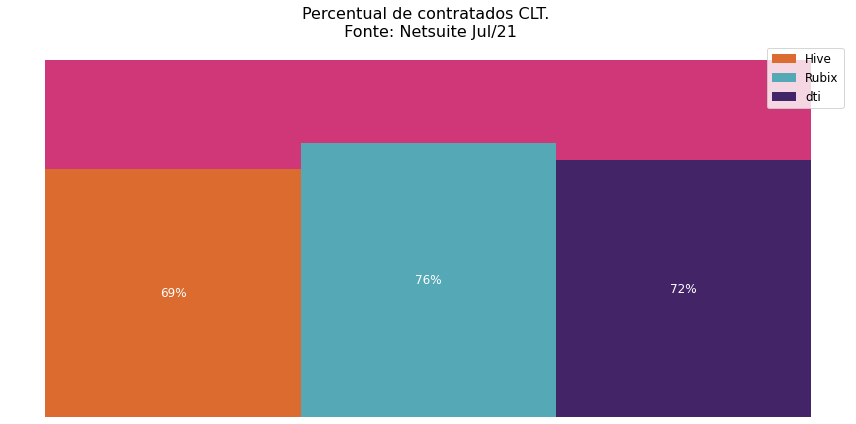

In [18]:
# conta clts e estagiários
hiveTipo = dadosHiveSemDuplicados['tipo'].value_counts().sort_values()
rubixTipo = dadosAliancaSemDuplicados['tipo'].value_counts().sort_values()
dtiTipo = dadosDTISemDuplicados['tipo'].value_counts().sort_values()

# percentual de clts (considera quem tem mais elementos como clt)
hiveTipo100 = hiveTipo[len(hiveTipo)-1]/hiveTipo.sum()
rubixTipo100 = rubixTipo[len(rubixTipo)-1]/rubixTipo.sum()
dtiTipo100 = dtiTipo[len(dtiTipo)-1]/dtiTipo.sum()

#parâmetros
largura = 0.3
pos1=-largura
pos2=0
pos3=largura

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(pos1,1,largura,color=corContraste[0])
ax.bar(pos1,hiveTipo100,largura,color=color[0],label='Hive')

ax.bar(pos2,1,largura,color=corContraste[0])
ax.bar(pos2,rubixTipo100,largura,color=color[1],label='Rubix')

ax.bar(pos3,1,largura,color=corContraste[0])
ax.bar(pos3,dtiTipo100,largura,color=color[2],label='dti')


# adicionar labels com as contagens
#hive
ypos1 = hiveTipo100/2
valor1 = hiveTipo100*100
ax.text(pos1,
        ypos1,
        str("%d" % valor1)+'%',
        ha='center',
        va='center',
        color='white',
        fontsize=12)
#rubix
ypos2 = rubixTipo100/2
valor2 = rubixTipo100*100
ax.text(pos2,
        ypos2,
        str("%d" % valor2)+'%',
        ha='center',
        va='center',
        color='white',
        fontsize=12)
#dti
ypos3 = dtiTipo100/2
valor3 = dtiTipo100*100
ax.text(pos3,
        ypos3,
        str("%d" % valor3)+'%',
        ha='center',
        va='center',
        color='white',
        fontsize=12)

#remover eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#textos
ax.set_xlabel('',fontsize=12)
ax.set_ylabel('',fontsize=12)
ax.set_xticks([])
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False) # labels along the bottom edge are off
ax.set_title('Percentual de contratados CLT. \n Fonte: Netsuite Jul/21',fontsize=16);
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
ax.legend()

fig.tight_layout()

# salvar figura
plt.savefig('tipoContrato.png')

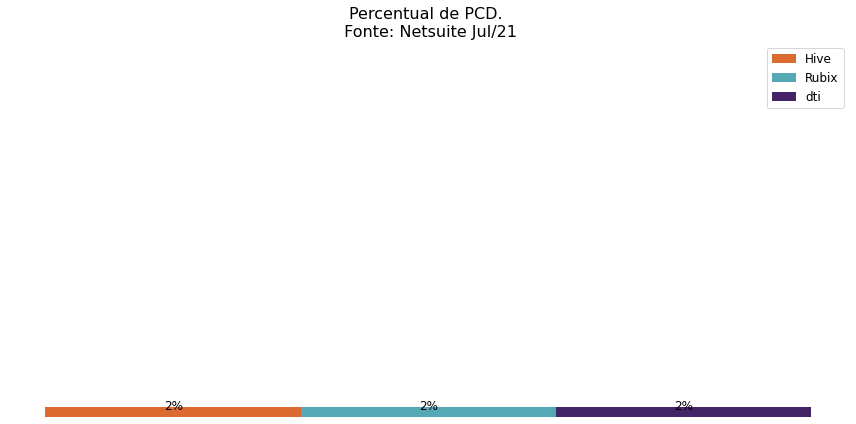

In [19]:
# conta clts e estagiários
hivePCD = dadosHiveSemDuplicados['pcd'].value_counts().sort_values()
rubixPCD = dadosAliancaSemDuplicados['pcd'].value_counts().sort_values()
dtiPCD = dadosDTISemDuplicados['pcd'].value_counts().sort_values()

# percentual de pcd (considera quem tem menos elementos como pcd)
hivePCD100 = hivePCD[0]/hivePCD.sum()
rubixPCD100 = rubixPCD[0]/rubixPCD.sum()
dtiPCD100 = dtiPCD[0]/dtiPCD.sum()

#parâmetros
largura = 0.3
pos1=-largura
pos2=0
pos3=largura

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(pos1,1,largura,color='white')
ax.bar(pos1,hivePCD100,largura,color=color[0],label='Hive')

ax.bar(pos2,1,largura,color='white')
ax.bar(pos2,rubixPCD100,largura,color=color[1],label='Rubix')

ax.bar(pos3,1,largura,color='white')
ax.bar(pos3,dtiPCD100,largura,color=color[2],label='dti')


# adicionar labels com as contagens
#hive
ypos1 = hivePCD100/2
valor1 = hivePCD100*100
ax.text(pos1,
        ypos1,
        str("%d" % valor1)+'%',
        ha='center',
        va='bottom',
        color='black',
        fontsize=12)
#rubix
ypos2 = rubixPCD100/2
valor2 = rubixPCD100*100
ax.text(pos2,
        ypos2,
        str("%d" % valor2)+'%',
        ha='center',
        va='bottom',
        color='black',
        fontsize=12)
#dti
ypos3 = dtiPCD100/2
valor3 = dtiPCD100*100
ax.text(pos3,
        ypos3,
        str("%d" % valor3)+'%',
        ha='center',
        va='bottom',
        color='black',
        fontsize=12)

#remover eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#textos
ax.set_xlabel('',fontsize=12)
ax.set_ylabel('',fontsize=12)
ax.set_xticks([])
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False) # labels along the bottom edge are off
ax.set_title('Percentual de PCD. \n Fonte: Netsuite Jul/21',fontsize=16);
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
ax.legend()

fig.tight_layout()

# salvar figura
plt.savefig('tipoContrato.png')

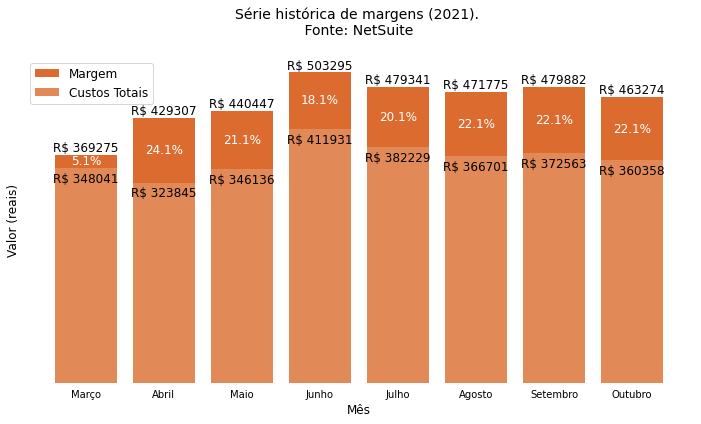

In [20]:
atual = financeiro.reset_index()#financeiro.loc[financeiro['tipo']=='realizado'].reset_index()
custoTotal = atual['custo']+atual['despesas']
margemAbs = atual['receitaLiquida']-custoTotal
margem = (1-custoTotal/atual['receitaLiquida'])*100

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(atual['mes'],atual['receitaLiquida'],color=corDegrade[0])
ax.bar(atual['mes'],atual['custo']+atual['despesas'],color=corDegrade[1])

# adicionar labels com as contagens
for idx, label in enumerate(range(len(atual['mes']))):
    ypos1 = ax.patches[idx].get_height()
    ypos2 = ax.patches[idx+len(atual['mes'])].get_height()
    # plota valor da margem
    meio = (ypos1-margemAbs[idx])+margemAbs[idx]/2
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            meio,
            str("%d.1" % margem[idx])+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    # plota valor total
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            ypos1,
            str('R$ '+"%d" % ypos1),
            ha='center',
            va='bottom',
            fontsize=12)
    # plota os custos
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            0.98*ypos2,
            str('R$ '+"%d" % custoTotal[idx]),
            ha='center',
            va='top',
            fontsize=12)

#remover eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Mês',fontsize=12)
ax.set_ylabel('Valor (reais)',fontsize=12)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False) # labels along the bottom edge are off
ax.set_title('Série histórica de margens (2021). \n Fonte: NetSuite \n',fontsize=14);
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.legend(['Margem','Custos Totais'],loc='best');
# salvar figura
plt.savefig('margem.png')

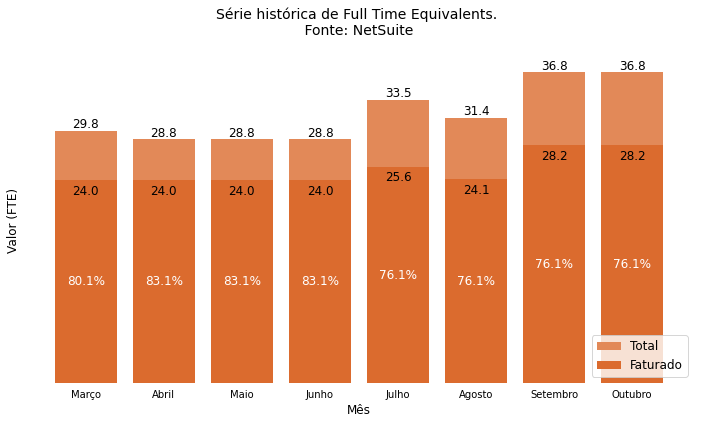

In [21]:
atual = financeiro.reset_index()#financeiro.loc[financeiro['tipo']=='realizado'].reset_index()
faturadoTotal = atual['faturadoFTE']
margemAbs = atual['faturadoFTE']-faturadoTotal
margem = faturadoTotal/atual['totalFTE']*100

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(atual['mes'],atual['totalFTE'],color=corDegrade[1])
ax.bar(atual['mes'],faturadoTotal,color=corDegrade[0])

# adicionar labels com as contagens
for idx, label in enumerate(range(len(atual['mes']))):
    ypos1 = ax.patches[idx].get_height()
    ypos2 = ax.patches[idx+len(atual['mes'])].get_height()
    # plota valor da margem
    meio = faturadoTotal[idx]/2
    
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            meio,
            str("%d.1" % margem[idx])+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    # plota valor total
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            ypos1,
            str("%.1f" % ypos1),
            ha='center',
            va='bottom',
            fontsize=12)
    # plota os custos
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            0.98*ypos2,
            str("%.1f" % faturadoTotal[idx]),
            ha='center',
            va='top',
            fontsize=12)

#remover eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Mês',fontsize=12)
ax.set_ylabel('Valor (FTE)',fontsize=12)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False) # labels along the bottom edge are off
ax.set_title('Série histórica de Full Time Equivalents. \n Fonte: NetSuite \n',fontsize=14);
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.legend(['Total','Faturado'],loc='lower right');
# salvar figura
plt.savefig('fte.png')

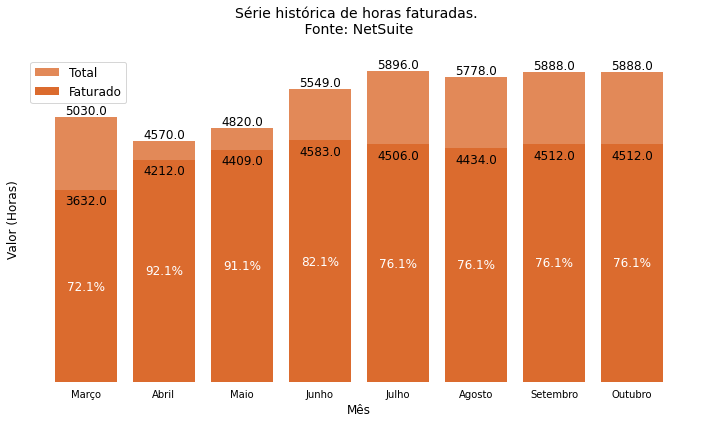

In [22]:
atual = financeiro.reset_index()#financeiro.loc[financeiro['tipo']=='realizado'].reset_index()
faturadoTotal = atual['horasFaturadas']
margemAbs = atual['horasFaturadas']-faturadoTotal
margem = faturadoTotal/atual['totalHoras']*100

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(atual['mes'],atual['totalHoras'],color=corDegrade[1])
ax.bar(atual['mes'],faturadoTotal,color=corDegrade[0])

# adicionar labels com as contagens
for idx, label in enumerate(range(len(atual['mes']))):
    ypos1 = ax.patches[idx].get_height()
    ypos2 = ax.patches[idx+len(atual['mes'])].get_height()
    # plota valor da margem
    meio = faturadoTotal[idx]/2
    
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            meio,
            str("%d.1" % margem[idx])+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    # plota valor total
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            ypos1,
            str("%.1f" % ypos1),
            ha='center',
            va='bottom',
            fontsize=12)
    # plota os custos
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            0.98*ypos2,
            str("%.1f" % faturadoTotal[idx]),
            ha='center',
            va='top',
            fontsize=12)

#remover eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Mês',fontsize=12)
ax.set_ylabel('Valor (Horas)',fontsize=12)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False) # labels along the bottom edge are off
ax.set_title('Série histórica de horas faturadas. \n Fonte: NetSuite \n',fontsize=14);
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.legend(['Total','Faturado'],loc='best');
# salvar figura
plt.savefig('horasFaturadas.png')

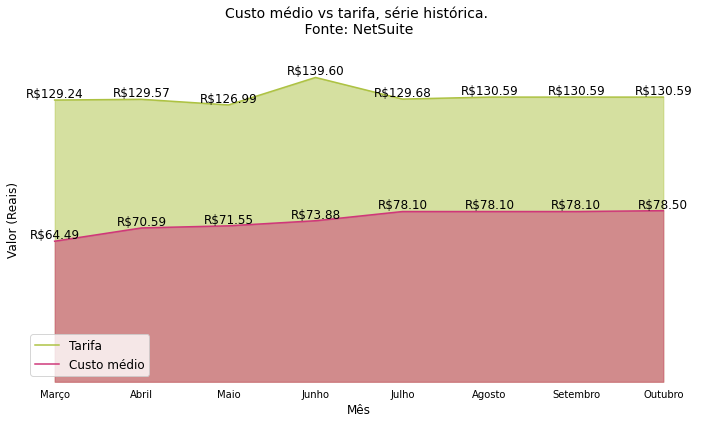

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(atual['mes'],atual['tarifaMedia'],color=corContraste[1])
ax.plot(atual['mes'],atual['custoMedioHora'],color=corContraste[0])

# adicionar labels com as contagens
for x,y in zip(atual['mes'],atual['tarifaMedia']):
    label = "R${:.2f}".format(y)
    ax.annotate(label,
                (x,y),
                ha='center',
                va='bottom',
                fontsize=12)
    
for x,y in zip(atual['mes'],atual['custoMedioHora']):
    label = "R${:.2f}".format(y)
    ax.annotate(label,
                (x,y),
                ha='center',
                va='bottom',
                fontsize=12)

# transforma em área
plt.ylim((0,max(atual['tarifaMedia'])+10))
plt.fill_between(atual['mes'],atual['tarifaMedia'],color=corContraste[1],alpha=0.5)
plt.fill_between(atual['mes'],atual['custoMedioHora'],color=corContraste[0],alpha=0.5)

#remover eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Mês',fontsize=12)
ax.set_ylabel('Valor (Reais)',fontsize=12)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False) # labels along the bottom edge are off
ax.set_title('Custo médio vs tarifa, série histórica. \n Fonte: NetSuite \n',fontsize=14);
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.legend(['Tarifa','Custo médio'],loc='best');
# salvar figura
plt.savefig('custoTarifa.png')

In [24]:
atual.head()

,index,mes,ano,tipo,receitaBruta,receitaLiquida,custo,custoCrossAlianca,despesas,totalHoras,custoMedioHora,horasFaturadas,tarifaMedia,totalFTE,faturadoFTE,diasUteisMes
0,0,Março,2021,realizado,469398.18,369275.56,324432.75,27201.20,23609.13,5030,64.49,3632,129.24,29.83,24.0,20
1,1,Abril,2021,realizado,545707.11,429307.78,322637.44,28561.26,1208.55,4570,70.59,4212,129.57,28.83,24.0,21
2,2,Maio,2021,realizado,559867.38,440447.70,344904.77,24149.11,1231.70,4820,71.55,4409,126.99,28.83,24.0,21
3,3,Junho,2021,realizado,639755.85,503295.88,410010.19,24149.11,1921.48,5549,73.88,4583,139.60,28.83,24.0,21
4,4,Julho,2021,forecast,610316.00,479341.92,379529.51,25874.11,2700.00,5896,78.10,4506,129.68,33.50,25.6,22


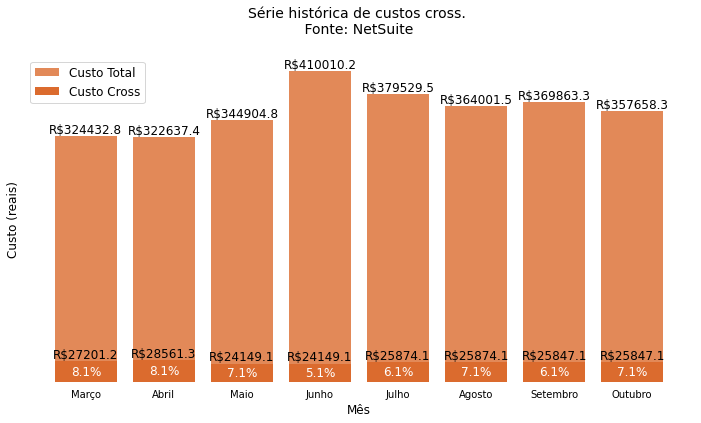

In [30]:
atual = financeiro.reset_index()#financeiro.loc[financeiro['tipo']=='realizado'].reset_index()
margem = atual['custoCrossAlianca']/atual['custo']*100

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(atual['mes'],atual['custo'],color=corDegrade[1])
ax.bar(atual['mes'],atual['custoCrossAlianca'],color=corDegrade[0])

# adicionar labels com as contagens
for idx, label in enumerate(range(len(atual['mes']))):
    ypos1 = ax.patches[idx].get_height()
    ypos2 = ax.patches[idx+len(atual['mes'])].get_height()
    
    # plota valor da margem
    meio = atual['custoCrossAlianca'][idx]/2
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            meio,
            str("%d.1" % margem[idx])+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    # plota valor total
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            ypos1,
            str("R$%.1f" % ypos1),
            ha='center',
            va='bottom',
            fontsize=12)
    # plota os custos
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            ypos2,
            str("R$%.1f" % atual['custoCrossAlianca'][idx]),
            ha='center',
            va='bottom',
            fontsize=12)

#remover eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Mês',fontsize=12)
ax.set_ylabel('Custo (reais)',fontsize=12)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False) # labels along the bottom edge are off
ax.set_title('Série histórica de custos cross. \n Fonte: NetSuite \n',fontsize=14);
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.legend(['Custo Total','Custo Cross'],loc='best');
# salvar figura
plt.savefig('custoCentralizado.png')

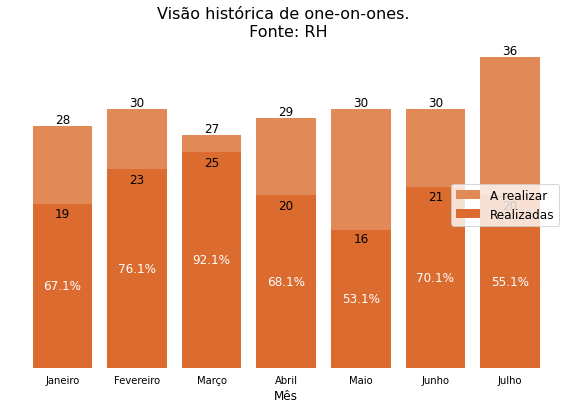

In [26]:
margemAbs = oneOnOne['pessoasTribo']-oneOnOne['realizadas']
margem = oneOnOne['realizadas']/oneOnOne['pessoasTribo']*100

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(oneOnOne['mes'],oneOnOne['pessoasTribo'],color=corDegrade[1])
ax.bar(oneOnOne['mes'],oneOnOne['realizadas'],color=corDegrade[0])

# adicionar labels com as contagens
for idx, label in enumerate(range(len(oneOnOne['mes']))):
    ypos1 = ax.patches[idx].get_height()
    ypos2 = ax.patches[idx+len(oneOnOne['mes'])].get_height()
    # plota valor da margem
    meio = oneOnOne['realizadas'][idx]/2
    
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            meio,
            str("%d.1" % margem[idx])+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    # plota valor total
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            ypos1,
            str("%d" % ypos1),
            ha='center',
            va='bottom',
            fontsize=12)
    # plota os custos
    ax.text(ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2,
            0.98*ypos2,
            str("%d" % oneOnOne['realizadas'][idx]),
            ha='center',
            va='top',
            fontsize=12)

#remover eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Mês',fontsize=12)
ax.set_ylabel('',fontsize=12)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False) # labels along the bottom edge are off
ax.set_title('Visão histórica de one-on-ones. \n Fonte: RH',fontsize=16);
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.legend(['A realizar','Realizadas'],loc='right');
# salvar figura
plt.savefig('one-on-ones.png')

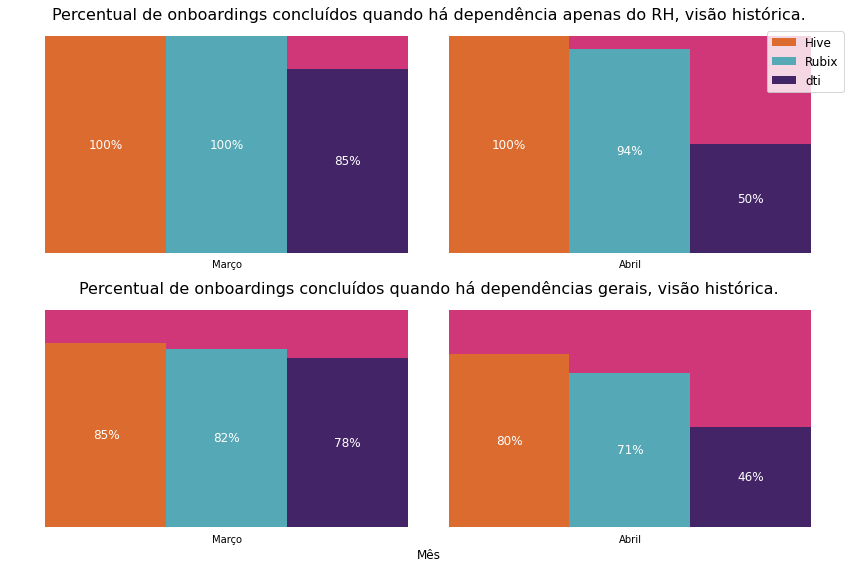

In [27]:
#labels
labelsGrupo = ['Hive','Rubix','dti']
labelsMes = onboarding['mes']

#parâmetros
largura = 0.3
x = np.arange(len(labelsMes))
pos1=x-largura
pos2=x
pos3=x+largura

color=[corDegrade[0],corContraste[3],corContraste[2]]

fig, ax = plt.subplots(2,1,figsize=(12,8))
ax[0].bar(pos1,1,largura,color=corContraste[0])
ax[0].bar(pos1,onboarding['mediaRHHive'],largura,color=corDegrade[0],label='Hive')

ax[0].bar(pos2,1,largura,color=corContraste[0])
ax[0].bar(pos2,onboarding['mediaRHRubix'],largura,color=corContraste[3],tick_label=list(labelsMes),label='Rubix')

ax[0].bar(pos3,1,largura,color=corContraste[0])
ax[0].bar(pos3,onboarding['mediaRHDti'],largura,color=corContraste[2],label='dti')


# adicionar labels com as contagens
for idx, label in enumerate(range(len(onboarding['mediaRHHive']))):
    #hive
    ypos1 = onboarding['mediaRHHive'][idx]/2
    valor1 = onboarding['mediaRHHive'][idx]*100
    ax[0].text(pos1[idx],
            ypos1,
            str("%d" % valor1)+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    #rubix
    ypos2 = onboarding['mediaRHRubix'][idx]/2
    valor2 = onboarding['mediaRHRubix'][idx]*100
    ax[0].text(pos2[idx],
            ypos2,
            str("%d" % valor2)+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    #dti
    ypos3 = onboarding['mediaRHDti'][idx]/2
    valor3 = onboarding['mediaRHDti'][idx]*100
    ax[0].text(pos3[idx],
            ypos3,
            str("%d" % valor3)+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    
#remover eixos
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)

#textos
ax[0].set_xlabel('',fontsize=12)
ax[0].set_ylabel('',fontsize=12)
ax[0].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False) # labels along the bottom edge are off
ax[0].set_title('Percentual de onboardings concluídos quando há dependência apenas do RH, visão histórica.',fontsize=16);
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
ax[0].legend()

# segundo gráfico
ax[1].bar(pos1,1,largura,color=corContraste[0])
ax[1].bar(pos1,onboarding['mediaOnboardingHive'],largura,color=corDegrade[0],label='Hive')

ax[1].bar(pos2,1,largura,color=corContraste[0])
ax[1].bar(pos2,onboarding['mediaOnboardingRubix'],largura,color=corContraste[3],tick_label=list(labelsMes),label='Rubix')

ax[1].bar(pos3,1,largura,color=corContraste[0])
ax[1].bar(pos3,onboarding['mediaOnboardingDti'],largura,color=corContraste[2],label='dti')


# adicionar labels com as contagens
for idx, label in enumerate(range(len(onboarding['mediaOnboardingHive']))):
    #hive
    ypos1 = onboarding['mediaOnboardingHive'][idx]/2
    valor1 = onboarding['mediaOnboardingHive'][idx]*100
    ax[1].text(pos1[idx],
            ypos1,
            str("%d" % valor1)+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    #rubix
    ypos2 = onboarding['mediaOnboardingRubix'][idx]/2
    valor2 = onboarding['mediaOnboardingRubix'][idx]*100
    ax[1].text(pos2[idx],
            ypos2,
            str("%d" % valor2)+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    #dti
    ypos3 = onboarding['mediaOnboardingDti'][idx]/2
    valor3 = onboarding['mediaOnboardingDti'][idx]*100
    ax[1].text(pos3[idx],
            ypos3,
            str("%d" % valor3)+'%',
            ha='center',
            va='center',
            color='white',
            fontsize=12)
    
#remover eixos
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)

#textos
ax[1].set_xlabel('Mês',fontsize=12)
ax[1].set_ylabel('',fontsize=12)
ax[1].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False) # labels along the bottom edge are off
ax[1].set_title('Percentual de onboardings concluídos quando há dependências gerais, visão histórica.',fontsize=16);
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
fig.tight_layout()

# salvar figura
plt.savefig('onboardings.png')